# AIML421 Assignment4 - Part 1: Performance Metrics in Regression
Dataset: diamonds.csv

In [11]:
import pandas as pd
import numpy as np
diamonds_data =pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass4data/part1/diamonds.csv",keep_default_na=False,na_values=['?'])
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


Perform Initial Data Analysis:

In [3]:
diamonds_data.shape

(53940, 11)

In [4]:
#check missing values
diamonds_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [5]:
diamonds_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
len(diamonds_data["Unnamed: 0"].unique())

53940

In [7]:
print(diamonds_data["cut"].unique(),
diamonds_data["color"].unique(),
diamonds_data["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] ['E' 'I' 'J' 'H' 'F' 'G' 'D'] ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


cut and color are definetely ordinal. how about clarity? Did some research on it, and found:
"The GIA Clarity Scale contains 11 grades, with most diamonds falling into the VS (very slightly included) or SI (slightly included) categories." So it's ordinal as well.

Next step - Initial Preproces the data - drop irelavent columns:

In [8]:
data=diamonds_data.drop(["Unnamed: 0"], axis=1)

To prevent data leakage, we split the data into training and test set first

In [9]:
from sklearn.model_selection import train_test_split
y=data['price']
X=data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

In [55]:
from sklearn.preprocessing import OrdinalEncoder
X_train_encoded=X_train.copy()
#encode cut
encoder_cut = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_train_encoded['cut'] = encoder_cut.fit_transform(X_train_encoded['cut'].values.reshape(-1, 1))
#encode color
encoder_color = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_train_encoded['color'] = encoder_color.fit_transform(X_train_encoded['color'].values.reshape(-1, 1))
#encode clarity
encoder_clarity = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_train_encoded['clarity'] = encoder_clarity.fit_transform(X_train_encoded['clarity'].values.reshape(-1, 1))

Next step - perform Exploratory Data Analysis

In [13]:
df=X_train_encoded.copy()
df["price"]=y_train

In [14]:
df.shape

(37758, 10)

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
36878,0.42,2.0,1.0,5.0,61.7,56.0,4.80,4.82,2.97,958
18820,1.03,2.0,3.0,6.0,61.7,56.0,6.45,6.56,4.00,7708
53406,0.82,2.0,1.0,3.0,62.1,55.0,6.04,6.01,3.74,2668
25954,1.40,2.0,3.0,6.0,60.8,57.0,7.21,7.23,4.39,15134
13825,1.00,4.0,1.0,5.0,63.5,56.0,6.37,6.32,4.03,5633


In [16]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [18]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.798166,2.556068,2.587955,3.832406,61.741557,57.458660,5.733020,5.737242,3.539638,3930.603130
std,0.472857,1.026089,1.700652,1.723270,1.426374,2.240281,1.120184,1.152877,0.708507,3973.019456
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.720000,4.720000,2.910000,953.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5330.000000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


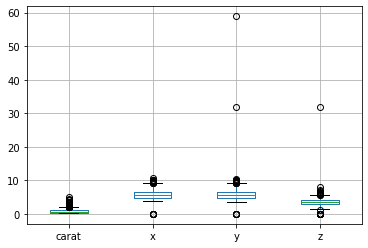

In [22]:
boxplot = df.boxplot(column=['carat','x','y','z'])  

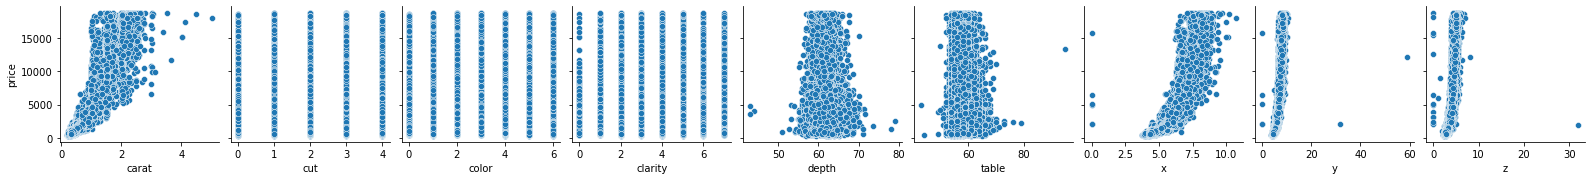

In [23]:
import seaborn as sns 
sns.pairplot(df,x_vars=["carat", "cut", "color","clarity","depth","table","x","y","z"],
    y_vars=["price"])

In [59]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.017691,0.289423,-0.208664,0.020201,0.185391,0.975345,0.942855,0.947481,0.922416
cut,0.017691,1.000000,0.006167,0.028456,-0.188927,0.151204,0.024782,0.029397,0.005135,0.037664
color,0.289423,0.006167,1.000000,-0.022534,0.041901,0.030368,0.267430,0.258293,0.263011,0.172734
clarity,-0.208664,0.028456,-0.022534,1.000000,-0.048171,-0.089370,-0.220970,-0.210929,-0.217828,-0.067328
depth,0.020201,-0.188927,0.041901,-0.048171,1.000000,-0.300535,-0.033831,-0.037689,0.085778,-0.015812
table,0.185391,0.151204,0.030368,-0.089370,-0.300535,1.000000,0.198658,0.184910,0.152677,0.130676
x,0.975345,0.024782,0.267430,-0.220970,-0.033831,0.198658,1.000000,0.964957,0.964535,0.885402
y,0.942855,0.029397,0.258293,-0.210929,-0.037689,0.184910,0.964957,1.000000,0.938387,0.857983
z,0.947481,0.005135,0.263011,-0.217828,0.085778,0.152677,0.964535,0.938387,1.000000,0.856832
price,0.922416,0.037664,0.172734,-0.067328,-0.015812,0.130676,0.885402,0.857983,0.856832,1.000000


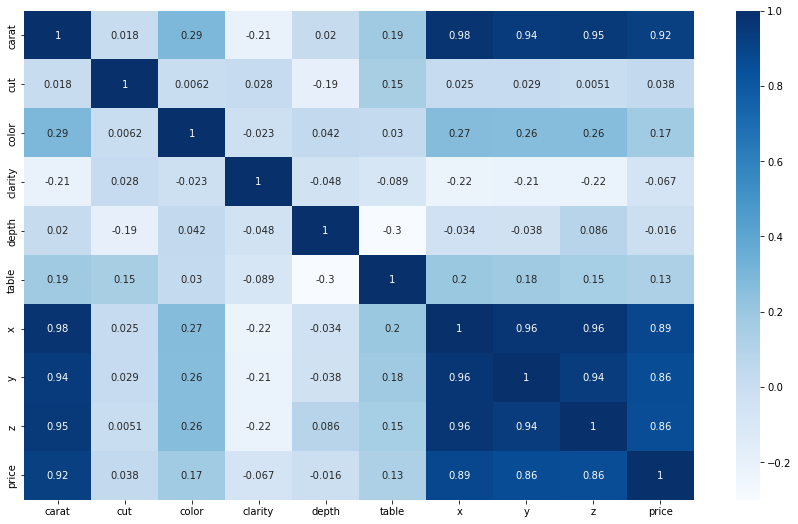

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

From the heatmap, I can see feature x, y, z are highly correlated with carat.
x and y, x and z, y and z are all highly correlated with each other. They are all highly correlated with the price as well. 

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'cut'}>,
        <AxesSubplot:title={'center':'color'}>],
       [<AxesSubplot:title={'center':'clarity'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

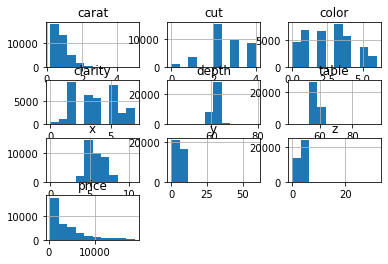

In [61]:
df.hist()

Next step - proprocssing the data based on EDA
The steps involved are: 
- encode ordinal features (was done in previous steps)
- remove outliers in carat,depth and table
- remove x, y, z. 
- transform test data

In [108]:
cols = ['depth', 'table', 'x','y','z'] # The columns to search for outliers in

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

X_train_clean = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
X_train_fs = X_train_clean.drop(["price"],axis=1)
y_train=X_train_clean['price']

In [110]:
#transform test data
X_test_encoded=X_test.copy()
X_test_encoded['cut']=encoder_cut.transform(X_test_encoded['cut'].values.reshape(-1,1))
X_test_encoded['color']=encoder_color.transform(X_test_encoded['color'].values.reshape(-1,1))
X_test_encoded['clarity']=encoder_clarity.transform(X_test_encoded['clarity'].values.reshape(-1,1))
X_test_fs=X_test_encoded

In [111]:
X_test_fs.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [112]:
#X_train_final=X_train_encoded
#X_test_final=X_test_encoded
X_train_final=X_train_fs
X_test_final=X_test_fs

In [113]:
X_train_final.shape

(37736, 9)

Next step - modelling

In [114]:
# code reference: https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/
def relative_squared_error(target, pred):
    target_mean = np.mean(target)
    se_sum = np.sum(np.square(target - pred))
    se_den = np.sum(np.square(target - target_mean))
    rse_loss = se_sum / se_den
    return rse_loss

In [115]:
#1 linear regression
import time
from sklearn.linear_model import LinearRegression
lr_start = time.time()
reg_lr = LinearRegression().fit(X_train_final, y_train)
lr_pred = reg_lr.predict(X_test_final)
lr_end = time.time()

#mse
from sklearn.metrics import mean_squared_error
lr_mse=round(mean_squared_error(y_test, lr_pred),2)

#rmse
from sklearn.metrics import mean_squared_error
lr_rmse=round(mean_squared_error(y_test, lr_pred,squared=False),2)

#rse
lr_rse=round(relative_squared_error(y_test, lr_pred),2)

#mae
from sklearn.metrics import mean_absolute_error
lr_mae=round(mean_absolute_error(y_test, lr_pred),2)

#run time
lr_runtime=round((lr_end-lr_start),2)

lr_metrics=['Linear Regression', lr_mse, lr_rmse, lr_rse, lr_mae, lr_runtime]
print(lr_metrics)


['Linear Regression', 1887805.41, 1373.97, 0.12, 860.95, 0.01]


In [116]:
#2 k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knn_start = time.time()
reg_knn = KNeighborsRegressor().fit(X_train_final, y_train)
knn_pred = reg_knn.predict(X_test_final)
knn_end = time.time()

knn_mse=round(mean_squared_error(y_test, knn_pred),2)
knn_rmse=round(mean_squared_error(y_test, knn_pred,squared=False),2)
knn_rse=round(relative_squared_error(y_test, knn_pred),2)
knn_mae=round(mean_absolute_error(y_test, knn_pred),2)
knn_runtime=round((knn_end-knn_start),2)

knn_metrics=['K-neighbors Regression', knn_mse, knn_rmse, knn_rse, knn_mae, knn_runtime]
print(knn_metrics)


['K-neighbors Regression', 908288.54, 953.04, 0.06, 499.45, 0.51]


In [117]:
#3 ridge regression
from sklearn.linear_model import Ridge
rr_start = time.time()
reg_rr = Ridge(alpha=.5).fit(X_train_final, y_train)
rr_pred = reg_rr.predict(X_test_final)
rr_end = time.time()

rr_mse=round(mean_squared_error(y_test, rr_pred),2)
rr_rmse=round(mean_squared_error(y_test, rr_pred,squared=False),2)
rr_rse=round(relative_squared_error(y_test, rr_pred),2)
rr_mae=round(mean_absolute_error(y_test, rr_pred),2)
rr_runtime=round((rr_end-rr_start),2)

rr_metrics=['Ridge Regression', rr_mse, rr_rmse, rr_rse, rr_mae, rr_runtime]
print(rr_metrics)



['Ridge Regression', 1887817.84, 1373.98, 0.12, 861.14, 0.01]


In [118]:
#4 decision tree regression
from sklearn.tree import DecisionTreeRegressor
dt_start = time.time()
reg_dt = DecisionTreeRegressor().fit(X_train_final, y_train)
dt_pred = reg_dt.predict(X_test_final)
dt_end = time.time()

dt_mse=round(mean_squared_error(y_test, dt_pred),2)
dt_rmse=round(mean_squared_error(y_test, dt_pred,squared=False),2)
dt_rse=round(relative_squared_error(y_test, dt_pred),2)
dt_mae=round(mean_absolute_error(y_test, dt_pred),2)
dt_runtime=round((dt_end-dt_start),2)

dt_metrics=['Decision tree Regression', dt_mse, dt_rmse, dt_rse, dt_mae, dt_runtime]
print(dt_metrics)



['Decision tree Regression', 551080.87, 742.35, 0.03, 364.18, 0.19]


In [119]:
#5 Random Forest regression
from sklearn.ensemble import RandomForestRegressor
rf_start = time.time()
reg_rf = RandomForestRegressor().fit(X_train_final, y_train)
rf_pred = reg_rf.predict(X_test_final)
rf_end = time.time()

rf_mse=round(mean_squared_error(y_test, rf_pred),2)
rf_rmse=round(mean_squared_error(y_test, rf_pred,squared=False),2)
rf_rse=round(relative_squared_error(y_test, rf_pred),2)
rf_mae=round(mean_absolute_error(y_test, rf_pred),2)
rf_runtime=round((rf_end-rf_start),2)

rf_metrics=['Random Forest Regression', rf_mse, rf_rmse, rf_rse, rf_mae, rf_runtime]
print(rf_metrics)



['Random Forest Regression', 307373.35, 554.41, 0.02, 273.01, 12.43]


In [120]:
#6 gradient Boosting regression
from sklearn.ensemble import GradientBoostingRegressor
gb_start = time.time()
reg_gb = GradientBoostingRegressor().fit(X_train_final, y_train)
gb_pred = reg_gb.predict(X_test_final)
gb_end = time.time()

gb_mse=round(mean_squared_error(y_test, gb_pred),2)
gb_rmse=round(mean_squared_error(y_test, gb_pred,squared=False),2)
gb_rse=round(relative_squared_error(y_test, gb_pred),2)
gb_mae=round(mean_absolute_error(y_test, gb_pred),2)
gb_runtime=round((gb_end-gb_start),2)

gb_metrics=['Gradient Boosting Regression', gb_mse, gb_rmse, gb_rse, gb_mae, gb_runtime]
print(gb_metrics)



['Gradient Boosting Regression', 471878.61, 686.93, 0.03, 367.41, 3.17]


In [128]:
#7 SGD regression
from sklearn.linear_model import SGDRegressor
sgd_start = time.time()
reg_sgd = SGDRegressor(max_iter=10000, tol=1e-3,alpha=0.2).fit(X_train_final, y_train)
sgd_pred = reg_sgd.predict(X_test_final)
sgd_end = time.time()

sgd_mse=round(mean_squared_error(y_test, sgd_pred),2)
sgd_rmse=round(mean_squared_error(y_test, sgd_pred,squared=False),2)
sgd_rse=round(relative_squared_error(y_test, sgd_pred),2)
sgd_mae=round(mean_absolute_error(y_test, sgd_pred),2)
sgd_runtime=round((sgd_end-sgd_start),2)

sgd_metrics=['SGD Regression', sgd_mse, sgd_rmse, sgd_rse, sgd_mae, sgd_runtime]
print(sgd_metrics)



['SGD Regression', 3822585328211198.5, 61827059.84, 235661553.83, 47516460.36, 3.24]


In [122]:
#8 support vector regression
from sklearn.svm import SVR
svr_start = time.time()
reg_svr = SVR().fit(X_train_final, y_train)
svr_pred = reg_svr.predict(X_test_final)
svr_end = time.time()

svr_mse=round(mean_squared_error(y_test, svr_pred),2)
svr_rmse=round(mean_squared_error(y_test, svr_pred,squared=False),2)
svr_rse=round(relative_squared_error(y_test, svr_pred),2)
svr_mae=round(mean_absolute_error(y_test, svr_pred),2)
svr_runtime=round((svr_end-svr_start),2)

svr_metrics=['Support Vector Regression', svr_mse, svr_rmse, svr_rse, svr_mae, svr_runtime]
print(svr_metrics)



['Support Vector Regression', 18241959.33, 4271.06, 1.12, 2781.56, 198.02]


In [123]:
#9 linear SVR
from sklearn.svm import LinearSVR
lsvr_start = time.time()
reg_lsvr = LinearSVR().fit(X_train_final, y_train)
lsvr_pred = reg_lsvr.predict(X_test_final)
lsvr_end = time.time()

lsvr_mse=round(mean_squared_error(y_test, lsvr_pred),2)
lsvr_rmse=round(mean_squared_error(y_test, lsvr_pred,squared=False),2)
lsvr_rse=round(relative_squared_error(y_test, lsvr_pred),2)
lsvr_mae=round(mean_absolute_error(y_test, lsvr_pred),2)
lsvr_runtime=round((lsvr_end-lsvr_start),2)

lsvr_metrics=['Linear SVR Regression', lsvr_mse, lsvr_rmse, lsvr_rse, lsvr_mae, lsvr_runtime]
print(lsvr_metrics)


['Linear SVR Regression', 3625118.61, 1903.97, 0.22, 1097.81, 0.25]


In [124]:
#10 Multi-layer percetron regression
from sklearn.neural_network import MLPRegressor
mlp_start = time.time()
reg_mlp = MLPRegressor(hidden_layer_sizes=(100, ), activation = 'relu', solver = 'lbfgs',  learning_rate = 'adaptive').fit(X_train_final, y_train)
mlp_pred = reg_mlp.predict(X_test_final)
mlp_end = time.time()

mlp_mse=round(mean_squared_error(y_test, mlp_pred),2)
mlp_rmse=round(mean_squared_error(y_test, mlp_pred,squared=False),2)
mlp_rse=round(relative_squared_error(y_test,mlp_pred),2)
mlp_mae=round(mean_absolute_error(y_test, mlp_pred),2)
mlp_runtime=round((mlp_end-mlp_start),2)

mlp_metrics=['MLP Regression', mlp_mse, mlp_rmse, mlp_rse, mlp_mae, mlp_runtime]
print(mlp_metrics)


['MLP Regression', 3598366.96, 1896.94, 0.22, 1097.54, 0.24]


In [129]:
metrics=[lr_metrics,knn_metrics,rr_metrics,dt_metrics,rf_metrics,gb_metrics,sgd_metrics,svr_metrics,lsvr_metrics,mlp_metrics]
output=pd.DataFrame(columns=['Algorithm','MSE','RMSE','RSE','MAE','Run Time(seconds)'],data=metrics)
pd.set_option('display.float_format', '{:.2f}'.format)
output

,Algorithm,MSE,RMSE,RSE,MAE,Run Time(seconds)
0,Linear Regression,1887805.41,1373.97,0.12,860.95,0.01
1,K-neighbors Regression,908288.54,953.04,0.06,499.45,0.51
2,Ridge Regression,1887817.84,1373.98,0.12,861.14,0.01
3,Decision tree Regression,551080.87,742.35,0.03,364.18,0.19
4,Random Forest Regression,307373.35,554.41,0.02,273.01,12.43
5,Gradient Boosting Regression,471878.61,686.93,0.03,367.41,3.17
6,SGD Regression,3822585328211198.50,61827059.84,235661553.83,47516460.36,3.24
7,Support Vector Regression,18241959.33,4271.06,1.12,2781.56,198.02
8,Linear SVR Regression,3625118.61,1903.97,0.22,1097.81,0.25
9,MLP Regression,3598366.96,1896.94,0.22,1097.54,0.24
